In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import seaborn as sns

In [5]:
## Process
## Data Preprocessing


# Step 1: Load the IoT data
file_path = r"C:\Users\dtjab\Downloads\G3_iot.csv"  # Update with the correct file path
iot_data = pd.read_csv(file_path)

# Step 2: Clean the data
# Convert 'Date and Time' to datetime format, handling errors (NaT for invalid values)
iot_data['Date and Time'] = pd.to_datetime(iot_data['Date and Time'], errors='coerce')

# Drop rows with missing 'Date and Time' (invalid datetime entries)
iot_data = iot_data.dropna(subset=['Date and Time'])

# Clean 'Temperature' and 'Humidity' columns (remove units and convert to float)
iot_data['Temperature'] = iot_data['Temperature'].str.replace('°C', '', regex=False).astype(float)
iot_data['Humidity'] = iot_data['Humidity'].str.replace('%', '', regex=False).astype(float)

# Set 'Date and Time' as the index for time-based operations
iot_data = iot_data.set_index('Date and Time')

# Step 3: Resample the data (Hourly Averages)
iot_data_resampled = iot_data.resample('H').mean()

# Display the cleaned and resampled data
print("Cleaned and Resampled Data (Hourly Averages):")
print(iot_data_resampled.head())

# Save the processed data to a new CSV file (optional)
iot_data_resampled.to_csv('Processed_IoT_Data.csv')


Cleaned and Resampled Data (Hourly Averages):
                     Temperature   Humidity  pH Reading
Date and Time                                          
2024-08-11 00:00:00         28.9  55.000000    6.785000
2024-08-11 01:00:00         28.5  55.666667    6.976667
2024-08-11 02:00:00          NaN        NaN         NaN
2024-08-11 03:00:00          NaN        NaN         NaN
2024-08-11 04:00:00          NaN        NaN         NaN


Dominant frequency for Temperature: 0.0515 cycles per hour
 -> Corresponding period: 19.40 hours (0.81 days)


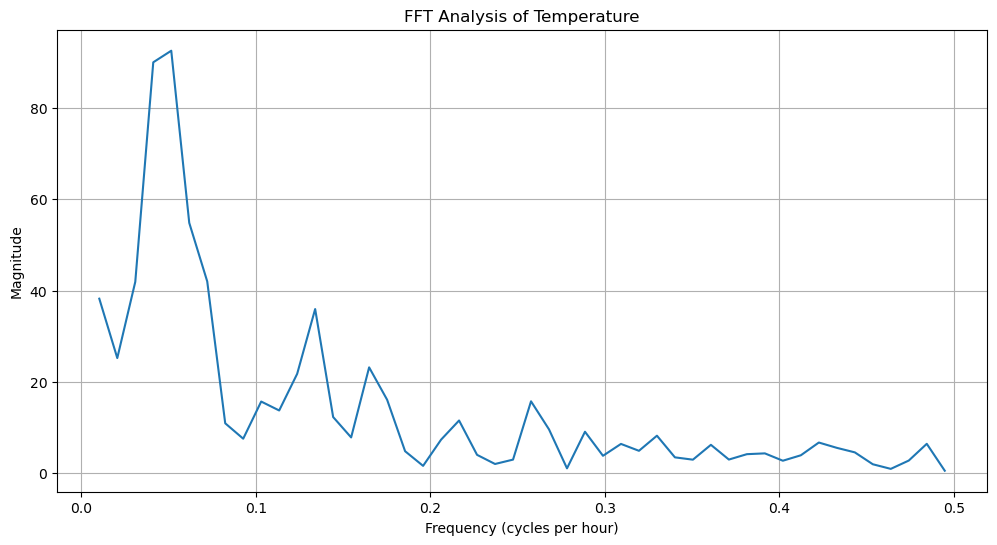

Dominant frequency for Humidity: 0.0515 cycles per hour
 -> Corresponding period: 19.40 hours (0.81 days)


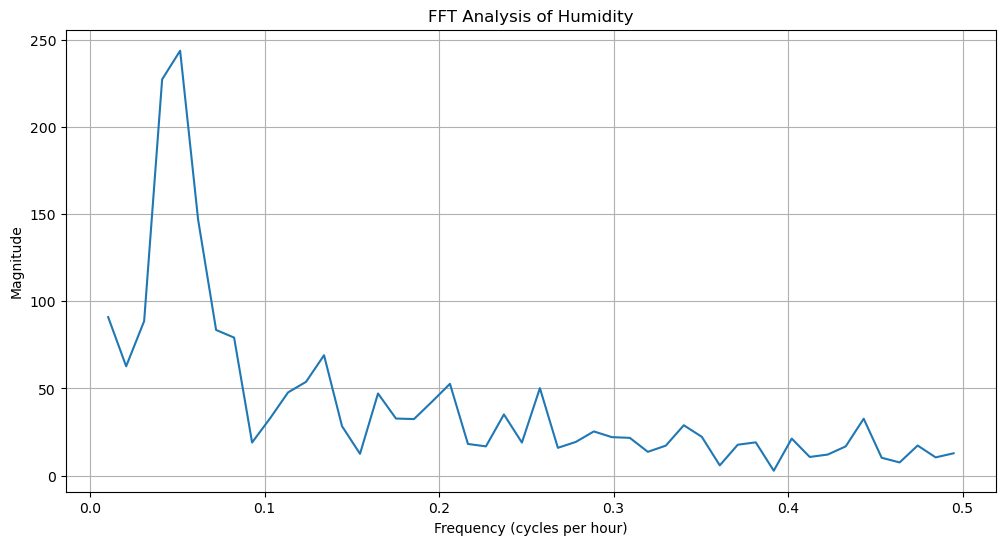

Dominant frequency for pH Reading: 0.0412 cycles per hour
 -> Corresponding period: 24.25 hours (1.01 days)


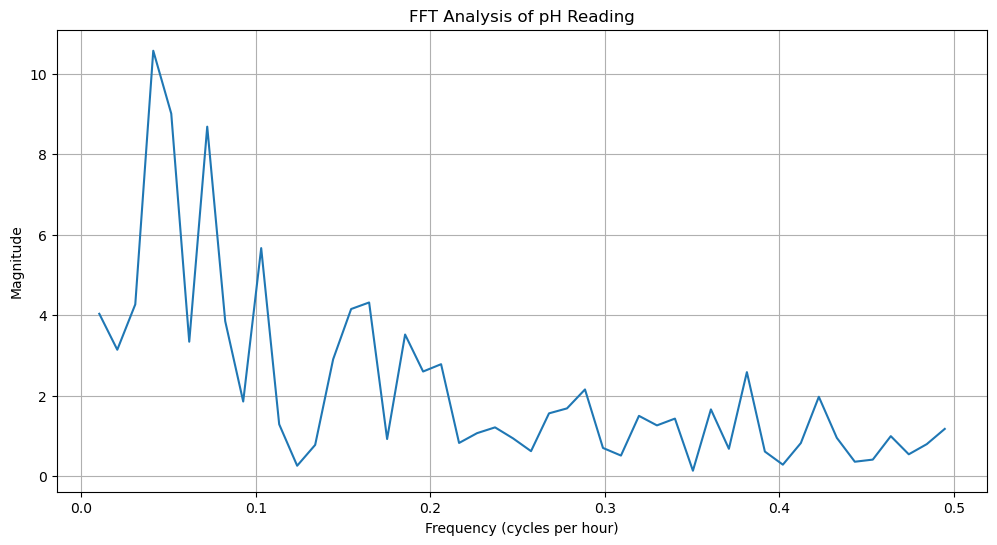

In [6]:
##	Apply Fast Fourier Transform (FFT)

file_path = 'Processed_IoT_Data.csv'  # Ensure this file exists from previous step
iot_data_resampled = pd.read_csv(file_path, index_col='Date and Time', parse_dates=True)

# Function to apply FFT and identify dominant frequencies
def analyze_fft(data, column_name, sampling_frequency):
    """
    Apply FFT to a time series and identify dominant frequencies.
    Args:
        data (pd.Series): Time series data.
        column_name (str): Name of the parameter being analyzed.
        sampling_frequency (float): Sampling frequency in hours (1 sample per hour = 1/24 frequency).
    """
    # Drop NaN values for the current column
    clean_data = data[column_name].dropna()

    # Perform FFT
    fft_values = np.fft.fft(clean_data)
    fft_freqs = np.fft.fftfreq(len(clean_data), d=sampling_frequency)

    # Compute the magnitude of FFT values
    fft_magnitude = np.abs(fft_values)

    # Identify positive frequencies only (since FFT outputs symmetric results)
    positive_freqs = fft_freqs[fft_freqs > 0]
    positive_magnitude = fft_magnitude[fft_freqs > 0]

    # Identify the dominant frequency
    dominant_frequency = positive_freqs[np.argmax(positive_magnitude)]
    print(f"Dominant frequency for {column_name}: {dominant_frequency:.4f} cycles per hour")

    # Convert frequency to more meaningful terms
    if dominant_frequency > 0:
        period_hours = 1 / dominant_frequency
        print(f" -> Corresponding period: {period_hours:.2f} hours ({period_hours/24:.2f} days)")

    # Plot the FFT results
    plt.figure(figsize=(12, 6))
    plt.plot(positive_freqs, positive_magnitude)
    plt.title(f"FFT Analysis of {column_name}")
    plt.xlabel("Frequency (cycles per hour)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Sampling frequency (data is resampled to hourly averages, so 1 sample per hour)
sampling_frequency = 1  # hours

# Apply FFT for Temperature, Humidity, and pH Reading
analyze_fft(iot_data_resampled, 'Temperature', sampling_frequency)
analyze_fft(iot_data_resampled, 'Humidity', sampling_frequency)
analyze_fft(iot_data_resampled, 'pH Reading', sampling_frequency)

Significant frequencies for Temperature:
 -> Frequency: 0.0103 cycles/hour | Period: 97.00 hours (4.04 days), Magnitude: 38.24
 -> Frequency: 0.0206 cycles/hour | Period: 48.50 hours (2.02 days), Magnitude: 25.22
 -> Frequency: 0.0309 cycles/hour | Period: 32.33 hours (1.35 days), Magnitude: 41.93
 -> Frequency: 0.0412 cycles/hour | Period: 24.25 hours (1.01 days), Magnitude: 90.04
 -> Frequency: 0.0515 cycles/hour | Period: 19.40 hours (0.81 days), Magnitude: 92.58
 -> Frequency: 0.0619 cycles/hour | Period: 16.17 hours (0.67 days), Magnitude: 54.85
 -> Frequency: 0.0722 cycles/hour | Period: 13.86 hours (0.58 days), Magnitude: 42.02
 -> Frequency: 0.0825 cycles/hour | Period: 12.12 hours (0.51 days), Magnitude: 10.93
 -> Frequency: 0.1031 cycles/hour | Period: 9.70 hours (0.40 days), Magnitude: 15.69
 -> Frequency: 0.1134 cycles/hour | Period: 8.82 hours (0.37 days), Magnitude: 13.74
 -> Frequency: 0.1237 cycles/hour | Period: 8.08 hours (0.34 days), Magnitude: 21.77
 -> Frequency: 0

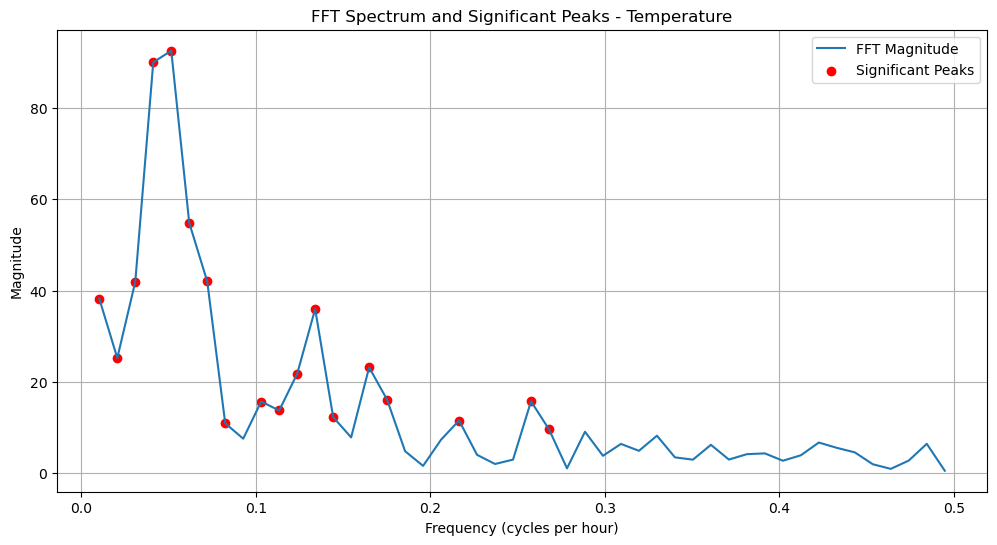

Significant frequencies for Humidity:
 -> Frequency: 0.0103 cycles/hour | Period: 97.00 hours (4.04 days), Magnitude: 90.90
 -> Frequency: 0.0206 cycles/hour | Period: 48.50 hours (2.02 days), Magnitude: 62.70
 -> Frequency: 0.0309 cycles/hour | Period: 32.33 hours (1.35 days), Magnitude: 88.63
 -> Frequency: 0.0412 cycles/hour | Period: 24.25 hours (1.01 days), Magnitude: 227.38
 -> Frequency: 0.0515 cycles/hour | Period: 19.40 hours (0.81 days), Magnitude: 243.82
 -> Frequency: 0.0619 cycles/hour | Period: 16.17 hours (0.67 days), Magnitude: 146.85
 -> Frequency: 0.0722 cycles/hour | Period: 13.86 hours (0.58 days), Magnitude: 83.53
 -> Frequency: 0.0825 cycles/hour | Period: 12.12 hours (0.51 days), Magnitude: 79.16
 -> Frequency: 0.1031 cycles/hour | Period: 9.70 hours (0.40 days), Magnitude: 32.83
 -> Frequency: 0.1134 cycles/hour | Period: 8.82 hours (0.37 days), Magnitude: 47.69
 -> Frequency: 0.1237 cycles/hour | Period: 8.08 hours (0.34 days), Magnitude: 53.76
 -> Frequency: 0

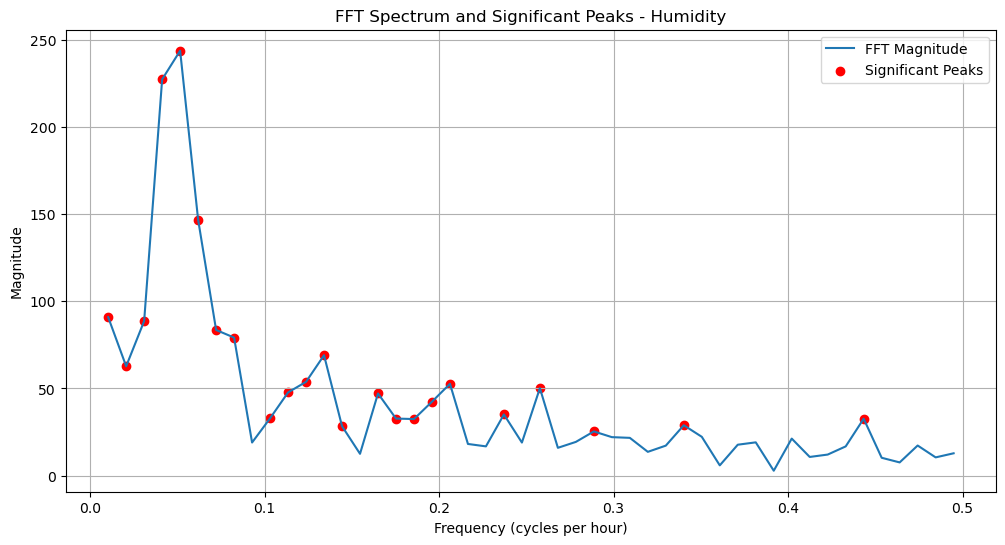

Significant frequencies for pH Reading:
 -> Frequency: 0.0103 cycles/hour | Period: 97.00 hours (4.04 days), Magnitude: 4.03
 -> Frequency: 0.0206 cycles/hour | Period: 48.50 hours (2.02 days), Magnitude: 3.14
 -> Frequency: 0.0309 cycles/hour | Period: 32.33 hours (1.35 days), Magnitude: 4.27
 -> Frequency: 0.0412 cycles/hour | Period: 24.25 hours (1.01 days), Magnitude: 10.57
 -> Frequency: 0.0515 cycles/hour | Period: 19.40 hours (0.81 days), Magnitude: 9.01
 -> Frequency: 0.0619 cycles/hour | Period: 16.17 hours (0.67 days), Magnitude: 3.34
 -> Frequency: 0.0722 cycles/hour | Period: 13.86 hours (0.58 days), Magnitude: 8.68
 -> Frequency: 0.0825 cycles/hour | Period: 12.12 hours (0.51 days), Magnitude: 3.85
 -> Frequency: 0.0928 cycles/hour | Period: 10.78 hours (0.45 days), Magnitude: 1.85
 -> Frequency: 0.1031 cycles/hour | Period: 9.70 hours (0.40 days), Magnitude: 5.66
 -> Frequency: 0.1134 cycles/hour | Period: 8.82 hours (0.37 days), Magnitude: 1.29
 -> Frequency: 0.1443 cycl

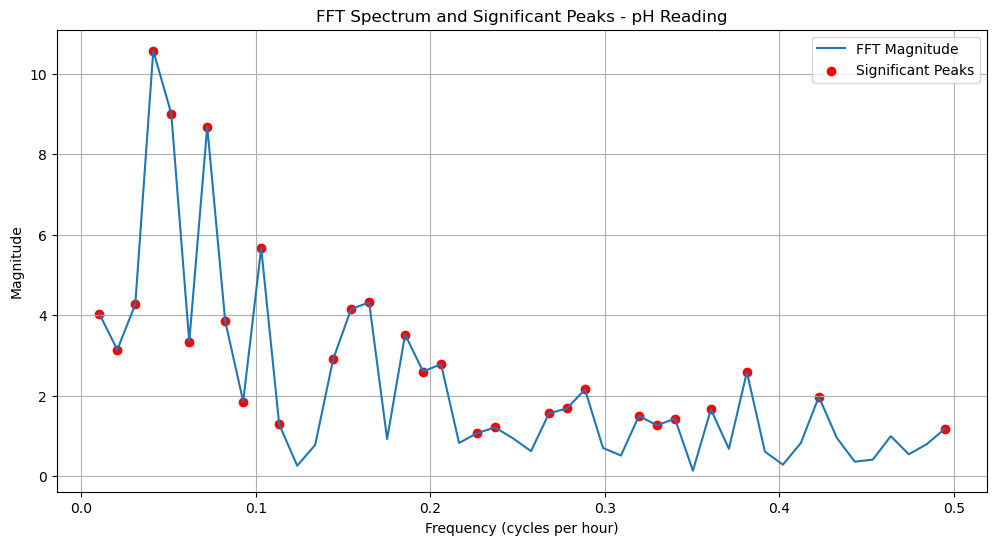

In [7]:
### Interpret Frequencies

file_path = 'Processed_IoT_Data.csv'  # Update to the correct file path
iot_data_resampled = pd.read_csv(file_path, index_col='Date and Time', parse_dates=True)

# Function to analyze and interpret FFT results
def analyze_and_interpret_fft(data, column_name, sampling_frequency):
    """
    Analyze FFT of a time series, identify dominant peaks, and interpret periodic trends.
    Args:
        data (pd.DataFrame): Time series data.
        column_name (str): Name of the parameter.
        sampling_frequency (float): Sampling frequency in hours (1 sample per hour).
    """
    # Drop NaN values for the current column
    clean_data = data[column_name].dropna()

    # Perform FFT
    fft_values = np.fft.fft(clean_data)
    fft_freqs = np.fft.fftfreq(len(clean_data), d=sampling_frequency)

    # Compute the magnitude of FFT values
    fft_magnitude = np.abs(fft_values)

    # Filter positive frequencies
    positive_freqs = fft_freqs[fft_freqs > 0]
    positive_magnitude = fft_magnitude[fft_freqs > 0]

    # Identify dominant peaks (frequencies with significant magnitude)
    threshold = 0.1 * max(positive_magnitude)  # Define threshold at 10% of max magnitude
    significant_indices = np.where(positive_magnitude > threshold)[0]
    significant_freqs = positive_freqs[significant_indices]
    significant_mags = positive_magnitude[significant_indices]

    # Print significant frequencies and their corresponding periods
    print(f"Significant frequencies for {column_name}:")
    for freq, mag in zip(significant_freqs, significant_mags):
        period_hours = 1 / freq
        period_days = period_hours / 24
        print(f" -> Frequency: {freq:.4f} cycles/hour | Period: {period_hours:.2f} hours ({period_days:.2f} days), Magnitude: {mag:.2f}")

    # Plot the FFT spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(positive_freqs, positive_magnitude, label="FFT Magnitude")
    plt.scatter(significant_freqs, significant_mags, color='red', label="Significant Peaks")
    plt.title(f"FFT Spectrum and Significant Peaks - {column_name}")
    plt.xlabel("Frequency (cycles per hour)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid()
    plt.show()

# Sampling frequency: 1 sample per hour
sampling_frequency = 1  # Hourly data

# Analyze and interpret FFT results for Temperature, Humidity, and pH Reading
analyze_and_interpret_fft(iot_data_resampled, 'Temperature', sampling_frequency)
analyze_and_interpret_fft(iot_data_resampled, 'Humidity', sampling_frequency)
analyze_and_interpret_fft(iot_data_resampled, 'pH Reading', sampling_frequency)


Correlation Matrix:
             Temperature  Humidity  pH Reading
Temperature     1.000000  0.899575   -0.264312
Humidity        0.899575  1.000000   -0.338110
pH Reading     -0.264312 -0.338110    1.000000


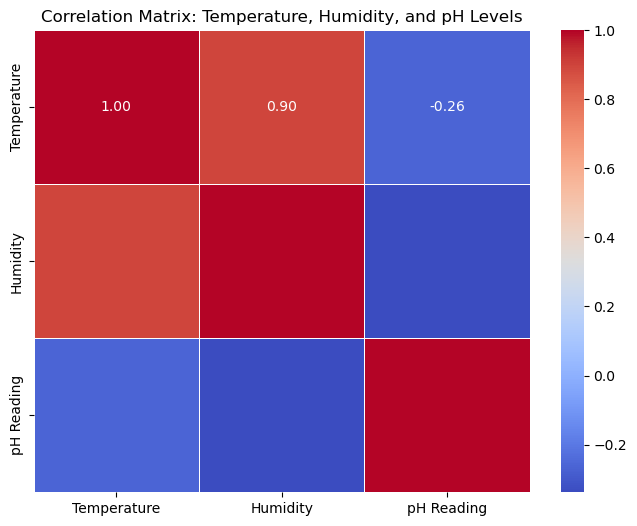

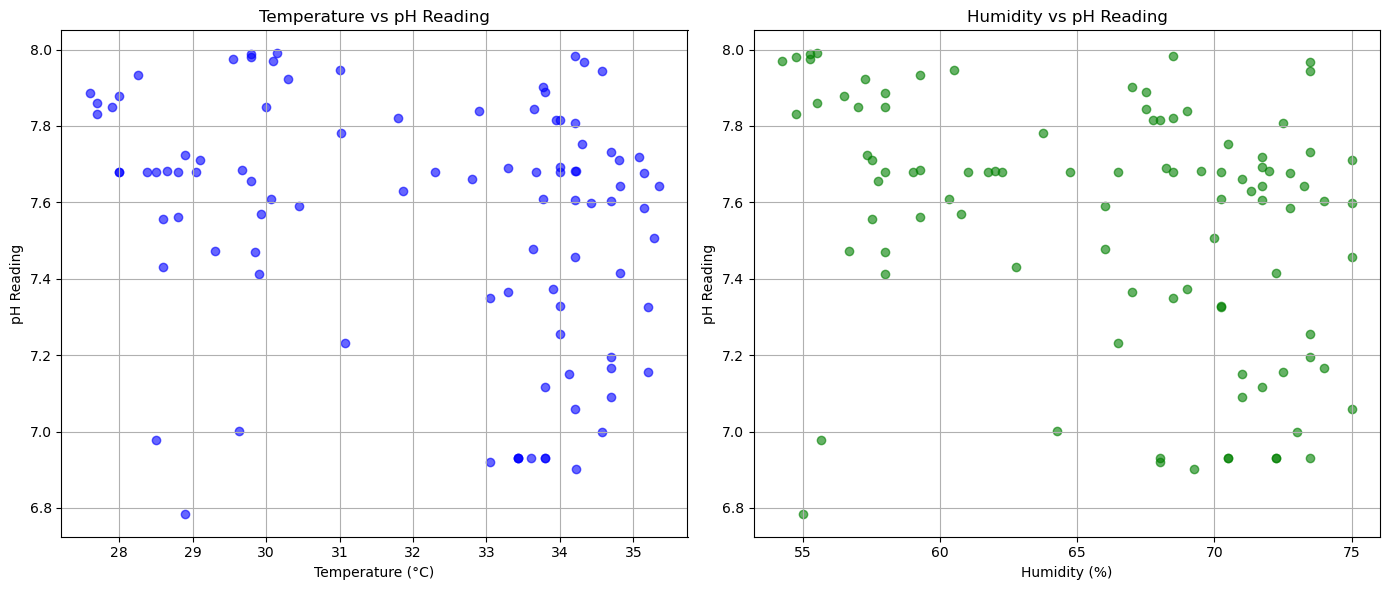

In [10]:
##Correlate Parameters


file_path = 'Processed_IoT_Data.csv'  # Replace with your file path
iot_data_resampled = pd.read_csv(file_path, index_col='Date and Time', parse_dates=True)

# Step 1: Calculate Correlation Matrix
correlation_matrix = iot_data_resampled.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 2: Visualize Correlation Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Temperature, Humidity, and pH Levels")
plt.show()

# Step 3: Scatter Plots for Pairwise Relationships
plt.figure(figsize=(14, 6))

# Temperature vs pH Reading
plt.subplot(1, 2, 1)
plt.scatter(iot_data_resampled['Temperature'], iot_data_resampled['pH Reading'], alpha=0.6, color='b')
plt.title("Temperature vs pH Reading")
plt.xlabel("Temperature (°C)")
plt.ylabel("pH Reading")
plt.grid(True)

# Humidity vs pH Reading
plt.subplot(1, 2, 2)
plt.scatter(iot_data_resampled['Humidity'], iot_data_resampled['pH Reading'], alpha=0.6, color='g')
plt.title("Humidity vs pH Reading")
plt.xlabel("Humidity (%)")
plt.ylabel("pH Reading")
plt.grid(True)

plt.tight_layout()
plt.show()